Lag en modell som predikerer tilsvarende XOR-operatoren. Før
du optimaliserer denne modellen må du initialisere
modellvariablene med tilfeldige tall for eksempel mellom -1 og 1. Visualiser både når optimaliseringen konvergerer og ikke
konvergerer mot en riktig modell.

In [90]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipympl

In [91]:
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype=torch.double).reshape(-1, 2)
y_train = torch.tensor([0.0, 1.0, 1.0, 0.0], dtype=torch.double).reshape(-1, 1)

In [92]:
class Model:

    def __init__(self):
        #Model variables

        self.W1 = torch.rand((2,2), requires_grad=True, dtype=torch.double)
        self.b1 = torch.rand((2), requires_grad=True, dtype=torch.double)
        self.W2 = torch.rand((2,1), requires_grad=True, dtype=torch.double)
        self.b2 = torch.rand((1,1), requires_grad=True, dtype=torch.double)



    # First layer
    def f1(self, x):
        return torch.sigmoid( x @ self.W1 + self.b1)
    
    # Second layer
    def f2(self, h):
        return torch.sigmoid( h @ self.W2 + self.b2)

    # Will predict result
    def f(self, x):
        return self.f2(self.f1(x))

    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy(self.f(x), y)
    
    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())

In [93]:
model_1 = Model()
model_2 = Model()

#Optimize: adjust W and b to minimize loss using Stochastic Gradient Descent(SGD)
optimizer_model = torch.optim.SGD([model_2.W1, model_2.b1, model_2.W2, model_2.b2], 0.1)
optimizer_model_1 = torch.optim.SGD([model_1.W1, model_1.b1, model_1.W2, model_1.b2], 0.1)

for epoch in range(10000):

    
    model_2.loss(x_train, y_train).backward() #Compute loss gradients
    optimizer_model.step() 
    optimizer_model.zero_grad()

    model_1.loss(x_train, y_train).backward()
    optimizer_model_1.step() #Optimizes by adjusting W and b
    #similiar to model.W -= model.W.grad * 0.01 (and same for b)

    #Clear gradients for next step
    optimizer_model_1.zero_grad()

In [94]:
# Print model variables and loss
print("W1 = %s, b1 = %s, W2 = %s, b2 = %s, loss = %s" % (model_1.W1, model_1.b1, model_1.W2, model_1.b2, model_1.loss(x_train, y_train)))


W1 = tensor([[6.3291, 4.2431],
        [6.3645, 4.2486]], dtype=torch.float64, requires_grad=True), b1 = tensor([-2.7204, -6.4852], dtype=torch.float64, requires_grad=True), W2 = tensor([[ 8.8906],
        [-9.5207]], dtype=torch.float64, requires_grad=True), b2 = tensor([[-4.0486]], dtype=torch.float64, requires_grad=True), loss = tensor(0.0267, dtype=torch.float64, grad_fn=<BinaryCrossEntropyBackward0>)


No handles with labels found to put in legend.


torch.Size([25, 25])
torch.Size([25, 25])


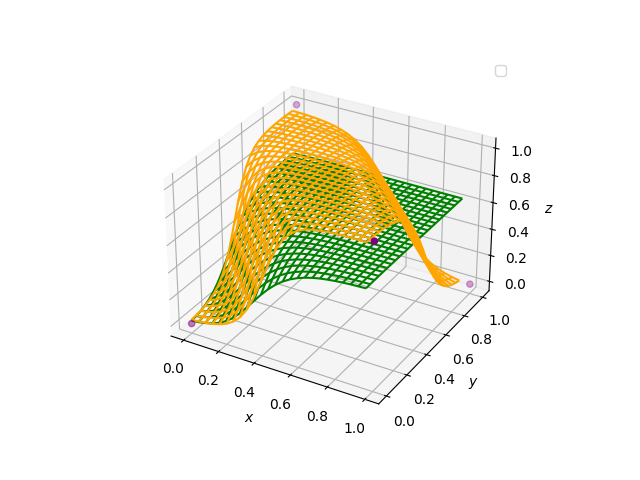

In [95]:
#Visualisering

%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # 3D plots require a subplot with 3D projection enabled

ax.scatter3D(x_train[:,0], x_train[:,1], y_train, color="purple")

x = torch.arange(start=0., end=1., step=0.04)  # Create the vector [0., 0.01, ..., 0.99]
x = x.expand(x.shape[0], -1)  # Create the square matrix [[0., 0.01, ..., 0.99], ..., [0., 0.01, ..., 0.99]]
y = x.T  # Transpose of x: [[0., ..., 0.], [0.01, ..., 0.01], ... [0.99, ..., 0.99]]
print(x.shape)
print(y.shape)
z2 = model_1.f(torch.cat(tuple(torch.dstack([x,y]))).double()).reshape(25,25)
z = model_2.f(torch.cat(tuple(torch.dstack([x,y]))).double()).reshape(25,25)
#print(z.shape)
ax.plot_wireframe(x, y, z.detach(), color="green")  # * and + are element-wise operators resulting in a matrix with the same shape as x and y
ax.plot_wireframe(x, y, z2.detach(), color="orange")


ax.set_xlabel('$x$')  # $$ activates LaTeX math notation
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.legend()
plt.show()